# Imports

In [1]:
import sqlite3
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import functionsML as f

import importlib
importlib.reload(f)

<module 'functionsML' from 'c:\\Users\\ricar\\Documents\\GitHub\\ProjetoML\\functionsML.py'>

**Import data sets**

In [2]:
train_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/train.csv")
test_db = pd.read_csv("C:/Users/ricar/Desktop/cars4you/test.csv")

### Data exploration

In [83]:
train_db.head(15)

#typos in transmission and fuel
#engineSize with NaN
#mileage, mpg and previousOwners with irational values
#previousOwners with negative values
#hasDamage seems to always be 0

,carID,Brand,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
0,69512,VW,Golf,2016.0,22290,Semi-Auto,28421.000000,Petrol,NaN,11.417268,2.0,63.0,4.000000,0.0
1,53000,Toyota,Yaris,2019.0,13790,Manual,4589.000000,Petrol,145.0,47.900000,1.5,50.0,1.000000,0.0
2,6366,Audi,Q2,2019.0,24990,Semi-Auto,3624.000000,Petrol,145.0,40.900000,1.5,56.0,4.000000,0.0
3,29021,Ford,FIESTA,2018.0,12500,anual,9102.000000,Petrol,145.0,65.700000,1.0,50.0,-2.340306,0.0
4,10062,BMW,2 Series,2019.0,22995,Manual,1000.000000,Petrol,145.0,42.800000,1.5,97.0,3.000000,0.0
5,14704,BMW,3 Series,2014.0,8199,anual,101153.348285,Diesel,30.0,65.700000,2.0,74.0,0.000000,0.0
6,6924,Audi,A3,2017.0,16089,Manual,21396.000000,Petrol,20.0,60.100000,1.4,75.0,4.000000,0.0
7,50783,Skoda,Octavia,2017.0,7500,Manual,116750.000000,Diesel,145.0,68.900000,1.6,59.0,4.000000,0.0
8,67071,VW,Passat,2017.0,15999,Semi-Auto,30339.000000,Diesel,150.0,62.800000,2.0,85.0,4.000000,0.0
9,23348,Ford,Focus,2019.0,15300,Manual,10700.000000,Petrol,150.0,60.100000,1.0,35.0,1.000000,0.0


In [84]:
train_db.describe(include='object')

,Brand,model,transmission,fuelType
count,74452,74456,74451,74462
unique,72,735,40,34
top,Ford,Focus,Manual,Petrol
freq,14808,6353,38050,37995


In [85]:
test_db.describe(include='object')

,Brand,model,transmission,fuelType
count,31918,31917,31944,31911
unique,64,593,38,29
top,Ford,Focus,Manual,Petrol
freq,6360,2721,16312,16113


In [86]:
train_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

,carID,year,price,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,75973.000000,74482.000000,75973.000000,74510.000000,68069.000000,68047.000000,74457.000000,74449.000000,74423.000000,74425.0
mean,37986.000000,2017.096611,16881.889553,23004.184088,120.329078,55.152666,1.660136,64.590667,1.994580,0.0
std,21931.660338,2.208704,9736.926322,22129.788366,65.521176,16.497837,0.573462,21.021065,1.472981,0.0
min,0.000000,1970.000000,450.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,18993.000000,2016.000000,10200.000000,7423.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,37986.000000,2017.000000,14699.000000,17300.000000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,56979.000000,2019.000000,20950.000000,32427.500000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,75972.000000,2024.121759,159999.000000,323000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


In [87]:
test_db.describe()
#missing values in year mileage tax mpg engineSize paintQuality% previousOwners and hasDamage
#alarming min values in mileage tax mpg engineSize paintQuality% previousOwners
#alarming max values in year mpg paintQuality% previousOwners
#engineSize of max 6.6 can be realistic if the car is a truck
#hasDamage is always 0

,carID,year,mileage,tax,mpg,engineSize,paintQuality%,previousOwners,hasDamage
count,32567.000000,31914.000000,31878.000000,29259.000000,29279.000000,31939.000000,31942.000000,31970.000000,31970.0
mean,92256.000000,2017.102299,22952.658921,120.569239,55.210728,1.665377,64.446667,2.006118,0.0
std,9401.427445,2.207969,22132.758713,65.560570,17.644635,0.574467,21.142188,1.472310,0.0
min,75973.000000,1991.000000,-58540.574478,-91.121630,-43.421768,-0.103493,1.638913,-2.345650,0.0
25%,84114.500000,2016.000000,7298.250000,125.000000,46.300000,1.200000,47.000000,1.000000,0.0
50%,92256.000000,2017.000000,17225.500000,145.000000,54.300000,1.600000,65.000000,2.000000,0.0
75%,100397.500000,2019.000000,32500.000000,145.000000,62.800000,2.000000,82.000000,3.000000,0.0
max,108539.000000,2024.121759,279000.000000,580.000000,470.800000,6.600000,125.594308,6.258371,0.0


In [88]:
train_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75973 entries, 0 to 75972
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           75973 non-null  int64  
 1   Brand           74452 non-null  object 
 2   model           74456 non-null  object 
 3   year            74482 non-null  float64
 4   price           75973 non-null  int64  
 5   transmission    74451 non-null  object 
 6   mileage         74510 non-null  float64
 7   fuelType        74462 non-null  object 
 8   tax             68069 non-null  float64
 9   mpg             68047 non-null  float64
 10  engineSize      74457 non-null  float64
 11  paintQuality%   74449 non-null  float64
 12  previousOwners  74423 non-null  float64
 13  hasDamage       74425 non-null  float64
dtypes: float64(8), int64(2), object(4)
memory usage: 8.1+ MB


In [89]:
test_db.info()
#year is float64, should be int64
#previousIwbers is float, should be int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32567 entries, 0 to 32566
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   carID           32567 non-null  int64  
 1   Brand           31918 non-null  object 
 2   model           31917 non-null  object 
 3   year            31914 non-null  float64
 4   transmission    31944 non-null  object 
 5   mileage         31878 non-null  float64
 6   fuelType        31911 non-null  object 
 7   tax             29259 non-null  float64
 8   mpg             29279 non-null  float64
 9   engineSize      31939 non-null  float64
 10  paintQuality%   31942 non-null  float64
 11  previousOwners  31970 non-null  float64
 12  hasDamage       31970 non-null  float64
dtypes: float64(8), int64(1), object(4)
memory usage: 3.2+ MB


In [4]:
f.missing_values_table(train_db)

Total columns: 14
Columns with missing values: 12



,Missing Values,Percent Missing (%)
mpg,7926,10.43
tax,7904,10.40
hasDamage,1548,2.04
previousOwners,1550,2.04
paintQuality%,1524,2.01
transmission,1522,2.00
model,1517,2.00
Brand,1521,2.00
engineSize,1516,2.00
fuelType,1511,1.99


In [ ]:
train_db[train_db["mpg"].isna()].head(10)

In [ ]:
train_db[train_db["tax"].isna()].head(10)

In [ ]:
train_db[train_db["hasDamage"].isna()].head(10)

In [ ]:
train_db[train_db["previousOwners"].isna()].head(10)

In [ ]:
train_db[train_db["paintQuality%"].isna()].head(10)

In [ ]:
train_db[train_db["transmission"].isna()].head(10)

In [ ]:
train_db[train_db["model"].isna()].head(10)

In [ ]:
train_db[train_db["Brand"].isna()].head(10)

In [ ]:
train_db[train_db["engineSize"].isna()].head(10)

In [ ]:
train_db[train_db["fuelType"].isna()].head(10)

In [ ]:
train_db[train_db["year"].isna()].head(10)

In [ ]:
train_db[train_db["mileage"].isna()].head(10)

In [ ]:
f.negative_values_table(train_db)

In [ ]:
train_db[train_db["tax"] < 0].head(10)

In [ ]:
train_db[train_db["tax"] < 0]["tax"].unique()[:10]

In [ ]:
train_db[train_db["mileage"] < 0].head(10)

In [ ]:
train_db[train_db["mileage"] < 0]["mileage"].unique()[:10]

In [ ]:
train_db[train_db["previousOwners"] < 0].head(10)

In [ ]:
train_db[train_db["previousOwners"] < 0]["previousOwners"].unique()[:10]

In [ ]:
train_db[train_db["engineSize"] < 0].head(10)

In [ ]:
train_db[train_db["engineSize"] < 0]["engineSize"].unique()[:10]

In [ ]:
train_db[train_db["mpg"] < 0].head(10)

In [ ]:
train_db[train_db["mpg"] < 0]["mpg"].unique()[:10]

In [7]:
f.irrational_values_table(train_db)

Total numeric columns: 10
Columns with irrational values: 7
Rows with at least one irrational value: 5060



,Irrational Count,Percent Irrational (%)
tax,759,1.00
engineSize,762,1.00
mileage,755,0.99
previousOwners,734,0.97
mpg,738,0.97
paintQuality%,726,0.96
year,723,0.95
Total (rows with any irrational value),5060,6.66


**Unique Values**

In [90]:
# Loop through each column in the DataFrame
for column in train_db.columns:

    # Print unique values and count for columns with fewer than 20 unique values
    print(f"Unique values in '{column}': {train_db[column].unique()}")
    print(f"Number of unique values: {train_db[column].nunique()}\n")

#typos in every categorical variable
#different letter casing in every categorical variable
#unrealistic negative values and irrational values in every numerical category


Unique values in 'carID': [69512 53000  6366 ... 54886   860 15795]
Number of unique values: 75973

Unique values in 'Brand': ['VW' 'Toyota' 'Audi' 'Ford' 'BMW' 'Skoda' 'Opel' 'Mercedes' 'FOR'
 'mercedes' 'Hyundai' 'w' 'ord' 'MW' 'bmw' nan 'yundai' 'BM' 'Toyot' 'udi'
 'Ope' 'AUDI' 'V' 'opel' 'pel' 'For' 'pe' 'Mercede' 'audi' 'MERCEDES'
 'OPEL' 'koda' 'FORD' 'Hyunda' 'W' 'Aud' 'vw' 'hyundai' 'skoda' 'ford'
 'TOYOTA' 'ercedes' 'oyota' 'toyota' 'SKODA' 'Skod' 'HYUNDAI' 'kod' 'v'
 'for' 'SKOD' 'aud' 'KODA' 'PEL' 'yunda' 'or' 'UDI' 'OYOTA' 'HYUNDA' 'mw'
 'OPE' 'mercede' 'ERCEDES' 'ercede' 'TOYOT' 'MERCEDE' 'ORD' 'ud' 'ope'
 'AUD' 'hyunda' 'skod' 'toyot']
Number of unique values: 72

Unique values in 'model': [' Golf' ' Yaris' ' Q2' ' FIESTA' ' 2 Series' '3 Series' ' A3' ' Octavia'
 ' Passat' ' Focus' ' Insignia' ' A Clas' ' Q3' ' Fabia' ' A Class' ' Ka+'
 ' 3 Series' ' GLC Class' ' I30' ' C Class' ' Polo' ' E Class' ' C Clas'
 ' Q5' ' Up' ' Fiesta' ' C-HR' ' Mokka X' ' Corsa' ' Astra' ' TT'

**Correlation Matrix**

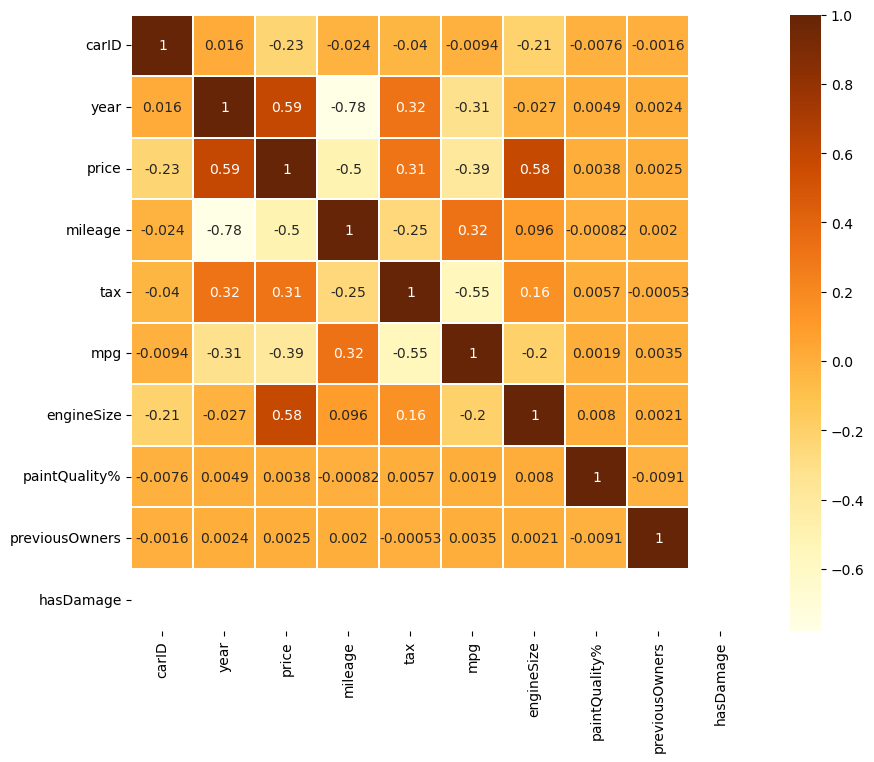

In [91]:
# Remove rows with missing values
temp = train_db.dropna()

# Select numerical columns for correlation analysis
corr_data = temp.select_dtypes(include=["number"])

# Compute the Spearman correlation matrix (Pearson is the default)
correlation_matrix = corr_data.corr(method="spearman")

# Plot the correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="YlOrBr", linewidths=0.1)
plt.show()

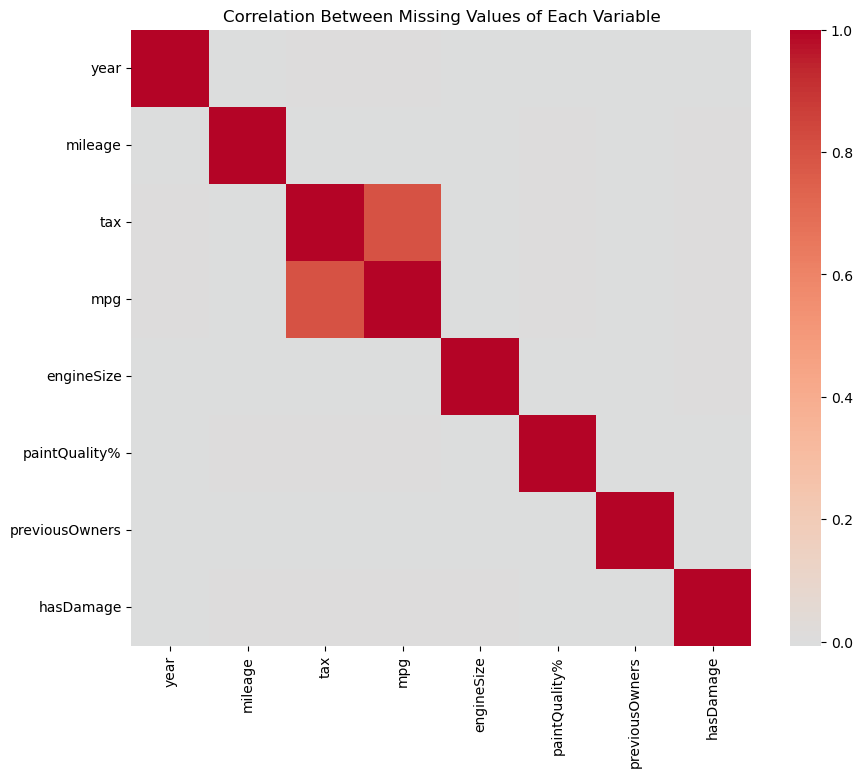

In [8]:

missing_mask = train_db.drop(columns=["carID", "price"], errors="ignore").select_dtypes(include=["number"]).isna()

missing_corr = missing_mask.corr()

# Plot the correlation matrix
plt.figure(figsize=(10,8))
sns.heatmap(missing_corr, cmap="coolwarm", center=0, annot=False)
plt.title("Correlation Between Missing Values of Each Variable")
plt.show()

## Distributions & Value Counts

In [99]:
train_db["Brand"].value_counts()

Brand
Ford        14808
Mercedes    10754
VW           9780
Opel         8645
BMW          6968
            ...  
OYOTA           2
SKOD            1
TOYOT           1
skod            1
toyot           1
Name: count, Length: 72, dtype: int64

In [100]:
train_db["model"].value_counts()

model
 Focus        6353
 C Class      4886
 Fiesta       4130
 Golf         3081
 Corsa        2182
              ... 
M5               1
 gls class       1
Mokka            1
 6 Serie         1
 JETTA           1
Name: count, Length: 735, dtype: int64

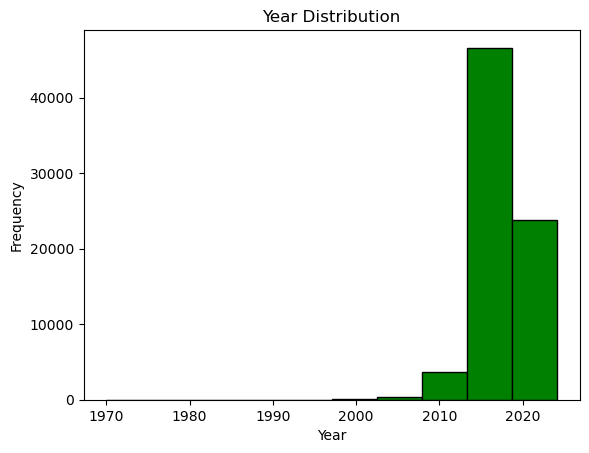

In [92]:
# Plot histogram for the "year" column
f.plot_histogram(train_db["year"], 
                 "Year",         # x-axis label
                 "Frequency",   # y-axis label
                 "Year Distribution")  # title of the plot

In [101]:
train_db["transmission"].value_counts()

transmission
Manual       38050
Semi-Auto    15545
Automatic    14003
anual          804
MANUAL         801
manual         770
Manua          759
unknown        690
 Manual        366
Semi-Aut       332
emi-Auto       325
semi-auto      324
utomatic       313
SEMI-AUTO      309
Automati       304
AUTOMATIC      289
automatic      282
unknow          18
Manual          16
UNKNOWN         14
ANUAL           13
nknown          13
anua            12
SEMI-AUT        11
MANUA           11
emi-auto        10
 MANUAL          9
EMI-AUTO         7
 Manual          7
automati         6
utomati          6
 manual          6
AUTOMATI         6
emi-Aut          5
Other            5
semi-aut         4
manua            2
UTOMATIC         2
manual           1
nknow            1
Name: count, dtype: int64

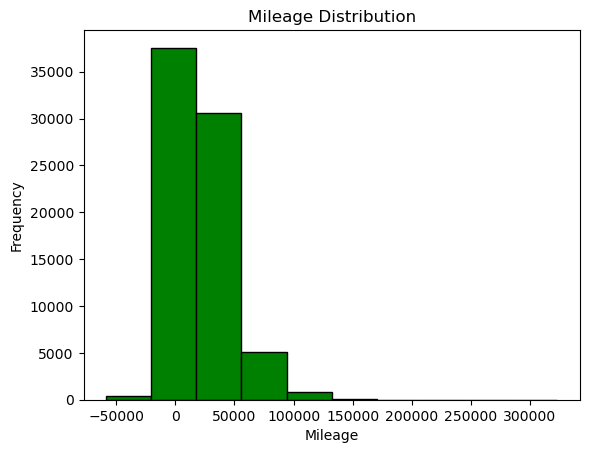

In [93]:
# Plot histogram for the "mileage" column
f.plot_histogram(train_db["mileage"], 
                 "Mileage",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mileage Distribution")  # title of the plot

In [102]:
train_db["fuelType"].value_counts()

fuelType
Petrol      37995
Diesel      28474
Hybrid       2043
PETROL        795
etrol         794
Petro         785
petrol        746
iesel         603
diesel        599
Diese         582
DIESEL        582
Other         150
HYBRID         50
hybrid         46
Hybri          43
ybrid          37
petro          18
etro           17
ETROL          16
IESEL          16
PETRO          14
DIESE          10
iese           10
diese           8
Othe            6
ther            6
Electric        4
YBRID           3
OTHER           3
other           2
HYBRI           2
ybri            1
ETRO            1
IESE            1
Name: count, dtype: int64

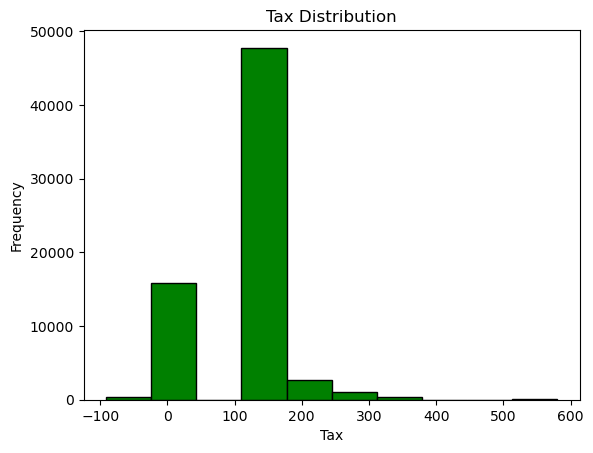

In [94]:
# Plot histogram for the "tax" column
f.plot_histogram(train_db["tax"], 
                 "Tax",         # x-axis label
                 "Frequency",   # y-axis label
                 "Tax Distribution")  # title of the ploty

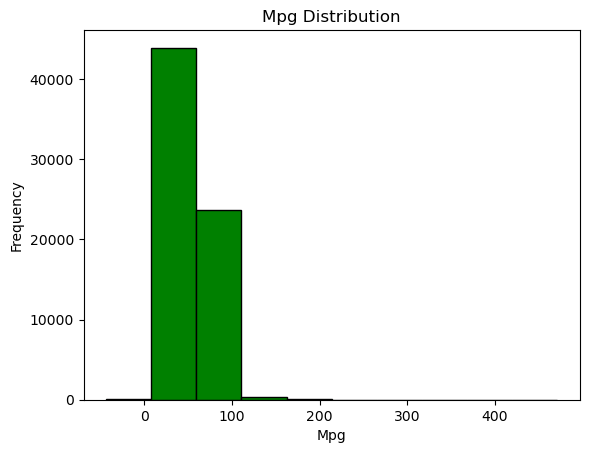

In [95]:
# Plot histogram for the "mpg" column
f.plot_histogram(train_db["mpg"], 
                 "Mpg",         # x-axis label
                 "Frequency",   # y-axis label
                 "Mpg Distribution")  # title of the ploty

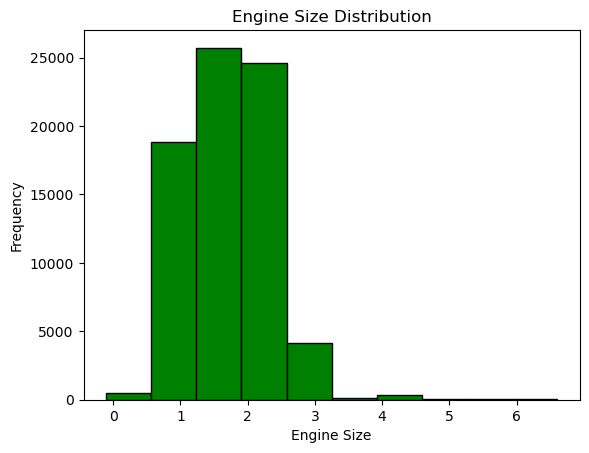

In [96]:
# Plot histogram for the "engineSize" column
f.plot_histogram(train_db["engineSize"], 
                 "Engine Size",         # x-axis label
                 "Frequency",   # y-axis label
                 "Engine Size Distribution")  # title of the ploty

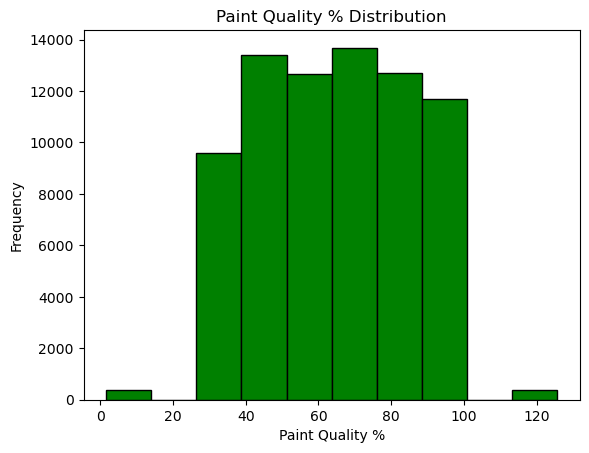

In [97]:
# Plot histogram for the "paintQuality%" column
f.plot_histogram(train_db["paintQuality%"], 
                 "Paint Quality %",         # x-axis label
                 "Frequency",   # y-axis label
                 "Paint Quality % Distribution")  # title of the ploty

## Fixing issues

In [208]:
# Drop irrelevant column
train_db = train_db.drop(columns="hasDamage")

# Lowercase text columns
text_cols = train_db.select_dtypes(include=["object"]).columns
train_db[text_cols] = train_db[text_cols].apply(lambda x: x.str.lower() if x.dtype=="object" else x)


# Loop and fix all categorical columns
for col in train_db.select_dtypes(include="object").columns:
    train_db = f.fix_typos(col, train_db)


In [209]:
# Rounding future Int values
train_db.loc[:, "previousOwners"] = train_db["previousOwners"].round()
train_db.loc[:, "year"] = train_db["year"].round()

# Rounds every irrational number into having one precision digit
for col in train_db.select_dtypes(include="float64").columns:
    # Round each column to 1 digit after the decimal
    train_db[col] = train_db[col].round(1)

# Remove paintQuality% above 100
train_db = train_db[train_db["paintQuality%"] <= 100]

# Remove every negative value out of the numeric columns
for col in train_db.select_dtypes(include="float64").columns:
    train_db = f.negative_to_nan_columns(col,train_db)

In [210]:
# Select all nominal columns
nominal_cols = train_db.select_dtypes(include='object').columns

# Compute Cramér's V between all pairs
for i, col1 in enumerate(nominal_cols):
    for col2 in nominal_cols[i+1:]:
        v = f.cramers_v(train_db[col1], train_db[col2])
        print(f"Cramér's V between {col1} and {col2}: {v:.3f}")


Cramér's V between Brand and model: 0.995
Cramér's V between Brand and transmission: 0.299
Cramér's V between Brand and fuelType: 0.278
Cramér's V between model and transmission: 0.364
Cramér's V between model and fuelType: 0.486
Cramér's V between transmission and fuelType: 0.199


In [9]:
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price']).columns
cat_cols = train_db.select_dtypes(include=['object']).columns

for n_col in num_cols:
    eta_scores = {}
    for c_col in cat_cols:
        eta = f.correlation_ratio(train_db[c_col], train_db[n_col])
        eta_scores[c_col] = eta
    
    # Sort by eta descending and take top 3
    top3 = sorted(eta_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    
    print(f"\nTop 3 strongest correlations for numeric column '{n_col}':")
    for c_col, eta in top3:
        print(f"  {c_col}: η = {eta:.3f}")



Top 3 strongest correlations for numeric column 'year':
  model: η = 0.366
  transmission: η = 0.170
  Brand: η = 0.093

Top 3 strongest correlations for numeric column 'mileage':
  model: η = 0.305
  fuelType: η = 0.219
  transmission: η = 0.141

Top 3 strongest correlations for numeric column 'tax':
  model: η = 0.437
  transmission: η = 0.198
  fuelType: η = 0.164

Top 3 strongest correlations for numeric column 'mpg':
  model: η = 0.627
  fuelType: η = 0.438
  Brand: η = 0.193

Top 3 strongest correlations for numeric column 'engineSize':
  model: η = 0.789
  Brand: η = 0.534
  transmission: η = 0.489

Top 3 strongest correlations for numeric column 'paintQuality%':
  model: η = 0.101
  Brand: η = 0.032
  transmission: η = 0.020

Top 3 strongest correlations for numeric column 'previousOwners':
  model: η = 0.098
  Brand: η = 0.028
  transmission: η = 0.019

Top 3 strongest correlations for numeric column 'hasDamage':
  Brand: η = 0.000
  model: η = 0.000
  transmission: η = 0.000

In [13]:
num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Categorical vs. Categorical: find directional associations
print("\nCategorical ↔ Categorical (Theil’s U directionally):")
for c1 in cat_cols:
    u_scores = {}
    for c2 in cat_cols:
        if c2 == c1:
            continue
        # U(c1 | c2) — how much knowing c2 tells about c1
        u_scores[c2] = f.theils_u(train_db[c1], train_db[c2])
    # pick best predictors for c1
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:3]
    print(f"\nFor categorical column '{c1}', best predictors (directional):")
    for c2, u in top3:
        print(f"  U({c1} | {c2}) = {u:.3f}")



Categorical ↔ Categorical (Theil’s U directionally):

For categorical column 'Brand', best predictors (directional):
  U(Brand | model) = 0.857
  U(Brand | transmission) = 0.084
  U(Brand | fuelType) = 0.048

For categorical column 'model', best predictors (directional):
  U(model | Brand) = 0.466
  U(model | transmission) = 0.074
  U(model | fuelType) = 0.071

For categorical column 'transmission', best predictors (directional):
  U(transmission | model) = 0.231
  U(transmission | Brand) = 0.142
  U(transmission | fuelType) = 0.052

For categorical column 'fuelType', best predictors (directional):
  U(fuelType | model) = 0.266
  U(fuelType | Brand) = 0.099
  U(fuelType | transmission) = 0.062


In [4]:
from itertools import combinations

num_cols = train_db.select_dtypes(include='number').drop(columns=['carID', 'price'], errors='ignore').columns
cat_cols = train_db.select_dtypes(include=['object', 'category']).columns

# Try single and multi-column combinations up to this size
max_combo_size = 4 

print("\nCategorical ↔ Categorical (Theil’s U with combinations):")
for target in cat_cols:
    u_scores = {}
    
    for combo_size in range(1, max_combo_size + 1):
        for combo in combinations([c for c in cat_cols if c != target], combo_size):
            # Build a joint predictor variable by concatenating category values
            joint_name = " + ".join(combo)
            joint_var = train_db[list(combo)].astype(str).agg("_".join, axis=1)
            
            # Directional association: how much knowing combo tells about target
            u = f.theils_u(train_db[target], joint_var)
            u_scores[joint_name] = u

    # pick top 3 combinations that best explain target
    top3 = sorted(u_scores.items(), key=lambda x: x[1], reverse=True)[:10]
    
    print(f"\nFor categorical column '{target}', best predictors (including combos):")
    for combo, u in top3:
        print(f"  U({target} | {combo}) = {u:.3f}")



Categorical ↔ Categorical (Theil’s U with combinations):

For categorical column 'Brand', best predictors (including combos):
  U(Brand | model + transmission + fuelType) = 0.865
  U(Brand | model + transmission) = 0.852
  U(Brand | model + fuelType) = 0.848
  U(Brand | model) = 0.840
  U(Brand | transmission + fuelType) = 0.126
  U(Brand | transmission) = 0.082
  U(Brand | fuelType) = 0.047

For categorical column 'model', best predictors (including combos):
  U(model | Brand + transmission + fuelType) = 0.550
  U(model | Brand + fuelType) = 0.507
  U(model | Brand + transmission) = 0.494
  U(model | Brand) = 0.457
  U(model | transmission + fuelType) = 0.146
  U(model | transmission) = 0.073
  U(model | fuelType) = 0.070

For categorical column 'transmission', best predictors (including combos):
  U(transmission | Brand + model + fuelType) = 0.313
  U(transmission | model + fuelType) = 0.282
  U(transmission | Brand + model) = 0.250
  U(transmission | model) = 0.227
  U(transmission

### -----POR DAR CLEAN UP-----

In [212]:


# Drop rows with missing model
train_db = train_db.dropna(subset=["model"])

# Round previousOwners and convert to integer

train_db.loc[:, "previousOwners"] = train_db["previousOwners"].astype("Int64")

train_db = f.fill_invalid_by_category("previousOwners",train_db,"model")


train_db = f.fill_invalid_by_category("paintQuality%",train_db,"model")

# Fill numeric year
train_db = f.fill_invalid_by_category("year",train_db,"model")
train_db.loc[:, "year"] = train_db.groupby("mileage")["year"].transform(lambda x: x.fillna(x.median()))
train_db.loc[:, "year"] = train_db.groupby("price")["year"].transform(lambda x: x.fillna(x.median()))
train_db.loc[:, "year"] = train_db.loc[:, "year"].copy().round().astype("Int64")
train_db = train_db.dropna(subset=["year"])

# Engine size treatment

train_db = f.fill_invalid_by_category("engineSize",train_db,"model")

# Tax and Mpg tratment

train_db = f.fill_invalid_by_category("mpg",train_db,"model")
train_db = f.fill_invalid_by_category("tax",train_db,"model")
train_db.loc[:, "tax"] = train_db.groupby("mpg")["tax"].transform(lambda x: x.fillna(x.median()))
train_db.loc[:, "mpg"] = train_db.groupby("tax")["mpg"].transform(lambda x: x.fillna(x.median()))


# Mileage

train_db = f.fill_invalid_by_category("mileage",train_db,"model")
train_db.loc[:, "mileage"] = train_db.groupby("year")["mileage"].transform(lambda x: x.fillna(x.mean()))
train_db.loc[:, "mileage"] = train_db.groupby("price")["mileage"].transform(lambda x: x.fillna(x.mean()))

# Fill categorical transmission
train_db = f.fill_invalid_by_category("transmission",train_db,"model")
train_db = f.fill_invalid_by_category("transmission",train_db,"fuelType")

# Fill categorical fuelType
train_db = f.fill_invalid_by_category("fuelType",train_db,"engineSize")
train_db = f.fill_invalid_by_category("fuelType",train_db,"model")


# Handle Brand for i3
idx_to_drop = train_db[(train_db['model'] == 'i3') & (train_db['Brand'].isna())].index
train_db = train_db.drop(idx_to_drop)

# Fill Brands by model
train_db.loc[:, "Brand"] = train_db.groupby("model")["Brand"].transform(lambda x: x.ffill().bfill())

C:\Users\ricar\AppData\Local\Temp\ipykernel_25952\4055989397.py:6: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[   4,    1,    4, <NA>,    3,    0,    4,    4,    4,    1,
 ...
    4,    4,    3,    0, <NA>,    0,    2,    3,    2,    1]
Length: 72599, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_db.loc[:, "previousOwners"] = train_db["previousOwners"].astype("Int64")
C:\Users\ricar\AppData\Local\Temp\ipykernel_25952\4055989397.py:17: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise in a future error of pandas. Value '<IntegerArray>
[2016, 2019, 2019, 2018, 2019, 2014, 2017, 2017, 2017, 2019,
 ...
 2020, 2016, 2017, 2018, 2018, 2015, 2013, 2017, 2015, 2018]
Length: 72599, dtype: Int64' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  train_db.loc[:, "year"] = 

In [213]:
train_db['fuelType'].value_counts()

fuelType
petrol      40011
diesel      30141
hybrid       2164
other         158
electric        4
Name: count, dtype: int64